# Easily export jupyter cells to python module
https://github.com/fastai/course-v3/blob/master/nbs/dl2/notebook2script.py

In [ ]:
! python /tf/src/scripts/notebook2script.py evaluation.ipynb

In [9]:
#export
from exp.nb_clustering import *
from sklearn.neighbors.kde import KernelDensity
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [2]:
cd /tf/src/data/features

/tf/src/data/features


# Prototyping

In [3]:
# Create some data
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [4]:
# Estimate the distribution of the data and then produce probability scores for it
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
fit = kde.score_samples(X)
fit = np.exp(fit)

array([0.66314807, 0.66314807, 0.6631456 , 0.66314807, 0.66314807,
       0.6631456 ])

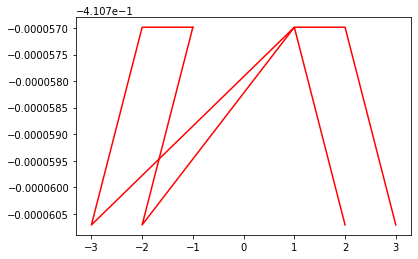

In [8]:
plt.plot(X, fit, color='red')

In [10]:
gmm = GaussianMixture(2)

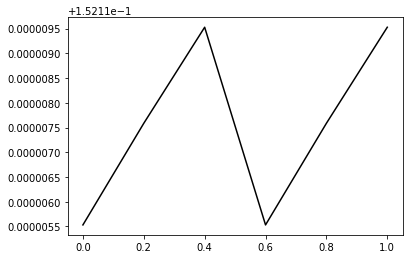

In [15]:
gmm.fit(X)

fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 1, 6).reshape(6,1)
logprob = gmm.score_samples(X)
pdf = np.exp(logprob)
#print np.max(pdf) -> 19.8409464401 !?
ax.plot(x, pdf, '-k')
plt.show()

In [19]:
pdf, np.sum(pdf)

(array([0.15211553, 0.15211759, 0.15211953, 0.15211553, 0.15211759,
        0.15211953]), 0.9127052876139963)

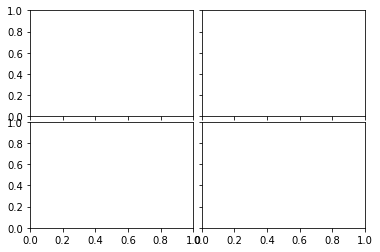

In [42]:
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
# X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
X_plot = np.mgrid[-5:5.1:0.5, -5:5.1:0.5].reshape(2,-1).T

In [43]:
X_plot

array([[-5. , -5. ],
       [-5. , -4.5],
       [-5. , -4. ],
       [-5. , -3.5],
       [-5. , -3. ],
       [-5. , -2.5],
       [-5. , -2. ],
       [-5. , -1.5],
       [-5. , -1. ],
       [-5. , -0.5],
       [-5. ,  0. ],
       [-5. ,  0.5],
       [-5. ,  1. ],
       [-5. ,  1.5],
       [-5. ,  2. ],
       [-5. ,  2.5],
       [-5. ,  3. ],
       [-5. ,  3.5],
       [-5. ,  4. ],
       [-5. ,  4.5],
       [-5. ,  5. ],
       [-4.5, -5. ],
       [-4.5, -4.5],
       [-4.5, -4. ],
       [-4.5, -3.5],
       [-4.5, -3. ],
       [-4.5, -2.5],
       [-4.5, -2. ],
       [-4.5, -1.5],
       [-4.5, -1. ],
       [-4.5, -0.5],
       [-4.5,  0. ],
       [-4.5,  0.5],
       [-4.5,  1. ],
       [-4.5,  1.5],
       [-4.5,  2. ],
       [-4.5,  2.5],
       [-4.5,  3. ],
       [-4.5,  3.5],
       [-4.5,  4. ],
       [-4.5,  4.5],
       [-4.5,  5. ],
       [-4. , -5. ],
       [-4. , -4.5],
       [-4. , -4. ],
       [-4. , -3.5],
       [-4. , -3. ],
       [-4. ,

In [34]:
X.shape, X_plot.shape

((20, 1), (1000, 1))

Text(-3.5, 0.4, 'Gaussian Kernel Density')

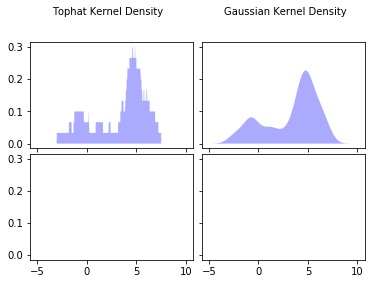

In [31]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)
density_param = {'density': True}

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[0, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[0, 0].text(-3.5, 0.4, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[0, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[0, 1].text(-3.5, 0.4, "Gaussian Kernel Density")

In [32]:
np.sum(np.exp(log_dens))

66.59945917546872

# Generate Probability of Feature Vectors

## Read in Feature Vectors

In [33]:
models_path = "/tf/src/data/features/output_space"
models_features = load_features(models_path)

In [44]:
features_1 = reduce_dims(list(models_features[0].values())[:100], 2)
features_2 = reduce_dims(list(models_features[1].values())[:100], 2)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.040752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.109978
[t-SNE] KL divergence after 300 iterations: 0.962342
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.540577
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.178940
[t-SNE] KL divergence after 300 iterations: 1.169503


ValueError: RGBA sequence should have length 3 or 4

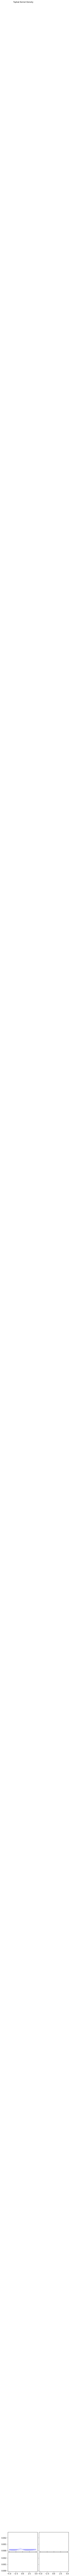

In [48]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)
density_param = {'density': True}

# tophat KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(features_1)
log_dens = kde.score_samples(X_plot)
ax[0, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[0, 0].text(-3.5, 0.4, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(features_2)
log_dens = kde.score_samples(X_plot)
ax[0, 1].fill(X_plot[0, :], X_plot[1, :], c =np.exp(log_dens), fc='#AAAAFF')
ax[0, 1].text(-3.5, 0.4, "Gaussian Kernel Density")

In [46]:
log_dens

array([-20.61052219, -22.53326773, -19.07245351, -15.87857911,
       -13.12907105, -10.82400741,  -8.96338821,  -7.54721345,
        -6.57548314,  -6.04819727,  -5.96535585,  -6.32695887,
        -7.13300634,  -8.38349825, -10.0784346 , -12.2178154 ,
       -14.80164064, -17.82990903, -21.29893119, -22.77527462,
       -19.27447331, -21.7024568 , -23.09250655, -19.55431352,
       -16.36040336, -13.61089529, -11.30583165,  -9.44521245,
        -8.02903769,  -7.05730738,  -6.53002151,  -6.44718009,
        -6.80878311,  -7.61483058,  -8.86532249, -10.56025884,
       -12.69963964, -15.28346488, -18.31173378, -21.782189  ,
       -23.69542179, -20.24828198, -23.23737554, -24.06341016,
       -20.4806016 , -17.28667206, -14.53716397, -12.23210033,
       -10.37148113,  -8.95530637,  -7.98357606,  -7.45629019,
        -7.37344877,  -7.73505179,  -8.54109926,  -9.79159117,
       -11.48652752, -13.62590832, -16.20973357, -19.23800277,
       -22.70933519, -25.03166659, -21.66652161, -25.21

# Using Gaussian Mixtures for KL-Divergence

## Read in Feature Vectors

In [49]:
models_path = "/tf/src/data/features/output_space"
models_features = load_features(models_path)

In [123]:
features_1 = reduce_dims(list(models_features[0].values())[:100], 2)
features_2 = reduce_dims(list(models_features[1].values())[:100], 2)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.040752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.868446
[t-SNE] KL divergence after 300 iterations: 1.021564
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.540577
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.823608
[t-SNE] KL divergence after 300 iterations: 0.968753


In [127]:
features_1.shape, features_2.shape

((100, 2), (100, 2))

In [128]:
features_1[0]

array([ 33.581974, -17.08915 ], dtype=float32)

In [124]:
gmm_p = GaussianMixture(2)
gmm_p.fit(features_1)

gmm_q = GaussianMixture(2)
gmm_q.fit(features_2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
def generate_distrobutions(feature_vectors, k):
    gmm_p = GaussianMixture(k)


In [125]:
#export
# From https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms
def gmm_kl(gmm_p, gmm_q, n_samples=10**5):
    X, _ = gmm_p.sample(n_samples) # Uses monte-carlo sampling
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    return log_p_X.mean() - log_q_X.mean()

In [126]:
kl = gmm_kl(gmm_p, gmm_q)
kl

0.12307947539021491

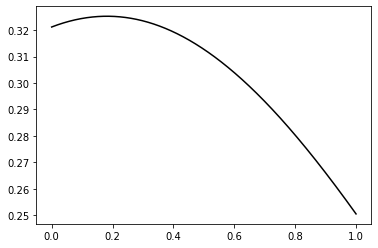

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 1, 1000).reshape(1000,1)
logprob = gmm_q.score_samples(x)
pdf = np.exp(logprob)
#print np.max(pdf) -> 19.8409464401 !?
ax.plot(x, pdf, '-k')
plt.show()

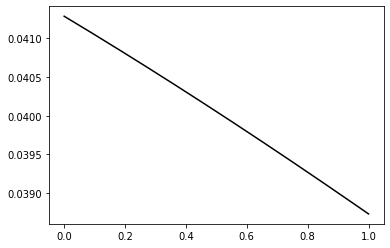

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 1, 1000).reshape(1000,1)
logprob = gmm_p.score_samples(x)
pdf = np.exp(logprob)
#print np.max(pdf) -> 19.8409464401 !?
ax.plot(x, pdf, '-k')
plt.show()